<a href="https://colab.research.google.com/github/Lizeth-Buitrago/Computacion__alto_desempenio_Big_Data/blob/main/Ciencia_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Limpieza y preparación de los datos

importar las librerias a usar

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

**1. Cargar los datos (dataset)**

In [ ]:
# Agregar Disco Google Drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Crear variable df con el dataset, tener en cuenta no usar encabezado del dataset

df = pd.read_csv('/content/drive/MyDrive/POWER_Point_Hourly_5years(in).csv', sep = ',', encoding = "ISO-8859-1", skiprows=15)
print(df)

       YEAR  MO  DY  HR  ALLSKY_SFC_SW_DWN    T2M   RH2M  PRECTOTCORR     PS  \
0      2020   1   1   0                0.0  16.11  97.02         2.12  82.31   
1      2020   1   1   1                0.0  16.04  96.61         2.13  82.26   
2      2020   1   1   2                0.0  15.88  96.98         2.16  82.22   
3      2020   1   1   3                0.0  15.62  97.36         1.86  82.22   
4      2020   1   1   4                0.0  15.40  97.65         1.27  82.24   
...     ...  ..  ..  ..                ...    ...    ...          ...    ...   
43867  2025   1   1  19                0.0  17.33  87.88         4.76  82.31   
43868  2025   1   1  20                0.0  16.77  89.14         3.94  82.37   
43869  2025   1   1  21                0.0  16.34  89.32         4.12  82.39   
43870  2025   1   1  22                0.0  16.28  87.29         6.85  82.41   
43871  2025   1   1  23                0.0  16.15  87.59         7.40  82.41   

       WS10M  WD10M  
0       1.43   35

**2. Explorar y diagnosticar**

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43872 entries, 0 to 43871
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YEAR               43872 non-null  int64  
 1   MO                 43872 non-null  int64  
 2   DY                 43872 non-null  int64  
 3   HR                 43872 non-null  int64  
 4   ALLSKY_SFC_SW_DWN  43872 non-null  float64
 5   T2M                43872 non-null  float64
 6   RH2M               43872 non-null  float64
 7   PRECTOTCORR        43872 non-null  float64
 8   PS                 43872 non-null  float64
 9   WS10M              43872 non-null  float64
 10  WD10M              43872 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 3.7 MB
None


In [ ]:
print(df.isnull().sum())

YEAR                 0
MO                   0
DY                   0
HR                   0
ALLSKY_SFC_SW_DWN    0
T2M                  0
RH2M                 0
PRECTOTCORR          0
PS                   0
WS10M                0
WD10M                0
dtype: int64


In [ ]:
# analisis basico
print(df.describe())

               YEAR            MO            DY            HR  \
count  43872.000000  43872.000000  43872.000000  43872.000000   
mean    2022.001641      6.518053     15.727024     11.500000   
std        1.416355      3.450724      8.806826      6.922265   
min     2020.000000      1.000000      1.000000      0.000000   
25%     2021.000000      4.000000      8.000000      5.750000   
50%     2022.000000      7.000000     16.000000     11.500000   
75%     2023.000000     10.000000     23.000000     17.250000   
max     2025.000000     12.000000     31.000000     23.000000   

       ALLSKY_SFC_SW_DWN           T2M          RH2M   PRECTOTCORR  \
count       43872.000000  43872.000000  43872.000000  43872.000000   
mean          195.885959     19.045799     78.475345      4.808085   
std           260.551693      3.483269     15.266261      9.519440   
min             0.000000      9.610000     28.970000      0.000000   
25%             0.000000     16.240000     65.170000      0.1000

In [ ]:
# Crear nuevo dataframe sin columnas identificadoras
cols_a_evaluar = [col for col in df.columns if col not in ['YEAR','MO','DY','HR']]

df_eda = df[cols_a_evaluar]

print(df_eda)

       ALLSKY_SFC_SW_DWN    T2M   RH2M  PRECTOTCORR     PS  WS10M  WD10M
0                    0.0  16.11  97.02         2.12  82.31   1.43   35.9
1                    0.0  16.04  96.61         2.13  82.26   1.29   25.8
2                    0.0  15.88  96.98         2.16  82.22   1.27   17.9
3                    0.0  15.62  97.36         1.86  82.22   1.36   21.1
4                    0.0  15.40  97.65         1.27  82.24   1.45   31.2
...                  ...    ...    ...          ...    ...    ...    ...
43867                0.0  17.33  87.88         4.76  82.31   0.91   22.0
43868                0.0  16.77  89.14         3.94  82.37   1.10   47.6
43869                0.0  16.34  89.32         4.12  82.39   1.15   61.0
43870                0.0  16.28  87.29         6.85  82.41   1.05   64.7
43871                0.0  16.15  87.59         7.40  82.41   1.00   63.9

[43872 rows x 7 columns]


**3. Limpiar nulos y duplicados**

In [ ]:
# En caso de tener valores nulos (null)

# imputer = SimpleImputer(strategy='mean')
# df['NOMBRE_COLUMNA_CON_NULOS'] = imputer.fit_transform(df[['NOMBRE_COLUMNA_CON_NULOS']])

In [ ]:
# Eliminar duplicados

df = df.drop_duplicates()

In [ ]:
print(df)

       YEAR  MO  DY  HR  ALLSKY_SFC_SW_DWN    T2M   RH2M  PRECTOTCORR     PS  \
0      2020   1   1   0                0.0  16.11  97.02         2.12  82.31   
1      2020   1   1   1                0.0  16.04  96.61         2.13  82.26   
2      2020   1   1   2                0.0  15.88  96.98         2.16  82.22   
3      2020   1   1   3                0.0  15.62  97.36         1.86  82.22   
4      2020   1   1   4                0.0  15.40  97.65         1.27  82.24   
...     ...  ..  ..  ..                ...    ...    ...          ...    ...   
43867  2025   1   1  19                0.0  17.33  87.88         4.76  82.31   
43868  2025   1   1  20                0.0  16.77  89.14         3.94  82.37   
43869  2025   1   1  21                0.0  16.34  89.32         4.12  82.39   
43870  2025   1   1  22                0.0  16.28  87.29         6.85  82.41   
43871  2025   1   1  23                0.0  16.15  87.59         7.40  82.41   

       WS10M  WD10M  
0       1.43   35

**4. Tratar casos atipicos**

In [ ]:
df_filtrado = df.copy()

filas_iniciales = df.shape[0]
filas_eliminadas_total = 0

for col in cols_a_evaluar:
    Q1 = df_filtrado[col].quantile(0.25)
    Q3 = df_filtrado[col].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Contar cuántos outliers hay en esta columna antes de filtrar
    outliers_col = df_filtrado[
        (df_filtrado[col] < limite_inferior) | (df_filtrado[col] > limite_superior)
    ].shape[0]

    print(f"Columna {col}: {outliers_col} outliers detectados")

    # Filtrar filas
    df_filtrado = df_filtrado[
        (df_filtrado[col] >= limite_inferior) & (df_filtrado[col] <= limite_superior)
    ]

# Mostrar resumen
print("\nResumen general:")
print("Filas originales:", filas_iniciales)
print("Filas finales sin outliers:", df_filtrado.shape[0])
print("Total filas eliminadas:", filas_iniciales - df_filtrado.shape[0])

porcentaje = (filas_iniciales - df_filtrado.shape[0])*100/filas_iniciales
print(f"Porcentaje filas eliminadas: {porcentaje:.2f}%")


Columna ALLSKY_SFC_SW_DWN: 1 outliers detectados
Columna T2M: 0 outliers detectados
Columna RH2M: 0 outliers detectados
Columna PRECTOTCORR: 4513 outliers detectados
Columna PS: 110 outliers detectados
Columna WS10M: 1457 outliers detectados
Columna WD10M: 4899 outliers detectados

Resumen general:
Filas originales: 43872
Filas finales sin outliers: 32892
Total filas eliminadas: 10980
Porcentaje filas eliminadas: 25.03%


**5. Escarlar y codificar**

In [ ]:
# Si tiene variables categóricas

#df = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

"""
# Copia del DataFrame original
df_codificado = df.copy()

# Detectar columnas de tipo object o category
cols_categoricas = df_codificado.select_dtypes(include=['object', 'category']).columns.tolist()

if cols_categoricas:
    print(f"Columnas categóricas encontradas: {cols_categoricas}")

    # Codificación One-Hot Encoding (elimina la primera categoría para evitar colinealidad)
    df_codificado = pd.get_dummies(df_codificado, columns=cols_categoricas, drop_first=True)

    print("Codificación aplicada correctamente.")
else:
    print("No se encontraron columnas categóricas en el DataFrame.")

print(df_codificado.head())
"""

'\n# Copia del DataFrame original\ndf_codificado = df.copy()\n\n# Detectar columnas de tipo object o category\ncols_categoricas = df_codificado.select_dtypes(include=[\'object\', \'category\']).columns.tolist()\n\nif cols_categoricas:\n    print(f"Columnas categóricas encontradas: {cols_categoricas}")\n\n    # Codificación One-Hot Encoding (elimina la primera categoría para evitar colinealidad)\n    df_codificado = pd.get_dummies(df_codificado, columns=cols_categoricas, drop_first=True)\n\n    print("Codificación aplicada correctamente.")\nelse:\n    print("No se encontraron columnas categóricas en el DataFrame.")\n\nprint(df_codificado.head())\n'

In [ ]:
# Escalar o normaizar datos

df_norm = df.copy()

scaler = MinMaxScaler()

for col in cols_a_evaluar:
    df_norm[col] = scaler.fit_transform(df_norm[[col]])

print(df_norm.head())

   YEAR  MO  DY  HR  ALLSKY_SFC_SW_DWN       T2M      RH2M  PRECTOTCORR  \
0  2020   1   1   0                0.0  0.329114  0.958046     0.007370   
1  2020   1   1   1                0.0  0.325570  0.952274     0.007405   
2  2020   1   1   2                0.0  0.317468  0.957483     0.007509   
3  2020   1   1   3                0.0  0.304304  0.962833     0.006466   
4  2020   1   1   4                0.0  0.293165  0.966915     0.004415   

         PS     WS10M     WD10M  
0  0.549020  0.172960  0.099778  
1  0.500000  0.155907  0.071707  
2  0.460784  0.153471  0.049750  
3  0.460784  0.164434  0.058644  
4  0.480392  0.175396  0.086715  


In [ ]:
print(df_norm.describe())

               YEAR            MO            DY            HR  \
count  43872.000000  43872.000000  43872.000000  43872.000000   
mean    2022.001641      6.518053     15.727024     11.500000   
std        1.416355      3.450724      8.806826      6.922265   
min     2020.000000      1.000000      1.000000      0.000000   
25%     2021.000000      4.000000      8.000000      5.750000   
50%     2022.000000      7.000000     16.000000     11.500000   
75%     2023.000000     10.000000     23.000000     17.250000   
max     2025.000000     12.000000     31.000000     23.000000   

       ALLSKY_SFC_SW_DWN           T2M          RH2M   PRECTOTCORR  \
count       43872.000000  43872.000000  43872.000000  43872.000000   
mean            0.190551      0.477762      0.696964      0.016715   
std             0.253455      0.176368      0.214927      0.033094   
min             0.000000      0.000000      0.000000      0.000000   
25%             0.000000      0.335696      0.509644      0.0003

# Visualización de variables y relaciones

Histograma

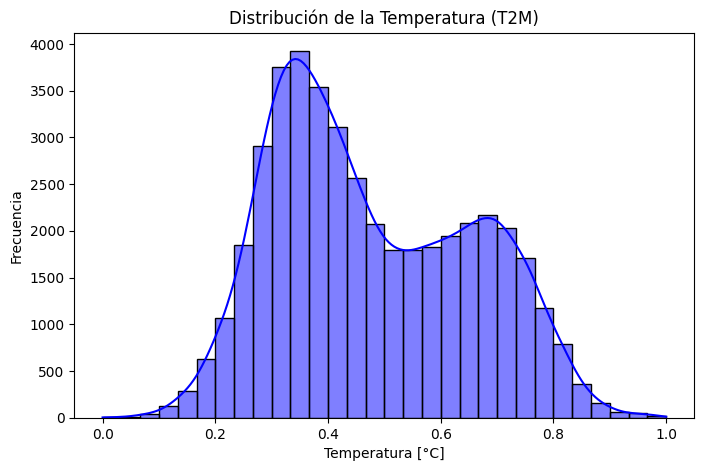

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df_norm['T2M'], kde=True, bins=30, color='blue')
plt.title('Distribución de la Temperatura (T2M)')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Frecuencia')
plt.show()

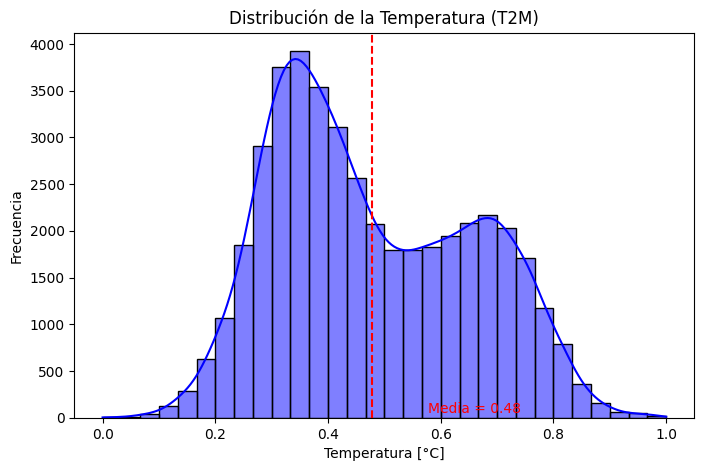

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df_norm['T2M'], kde=True, bins=30, color='blue')

media = df_norm['T2M'].mean()
plt.axvline(media, color='red', linestyle='--')
plt.text(media+0.1, 50, f'Media = {media:.2f}', color='red')

plt.title('Distribución de la Temperatura (T2M)')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Frecuencia')
plt.show()

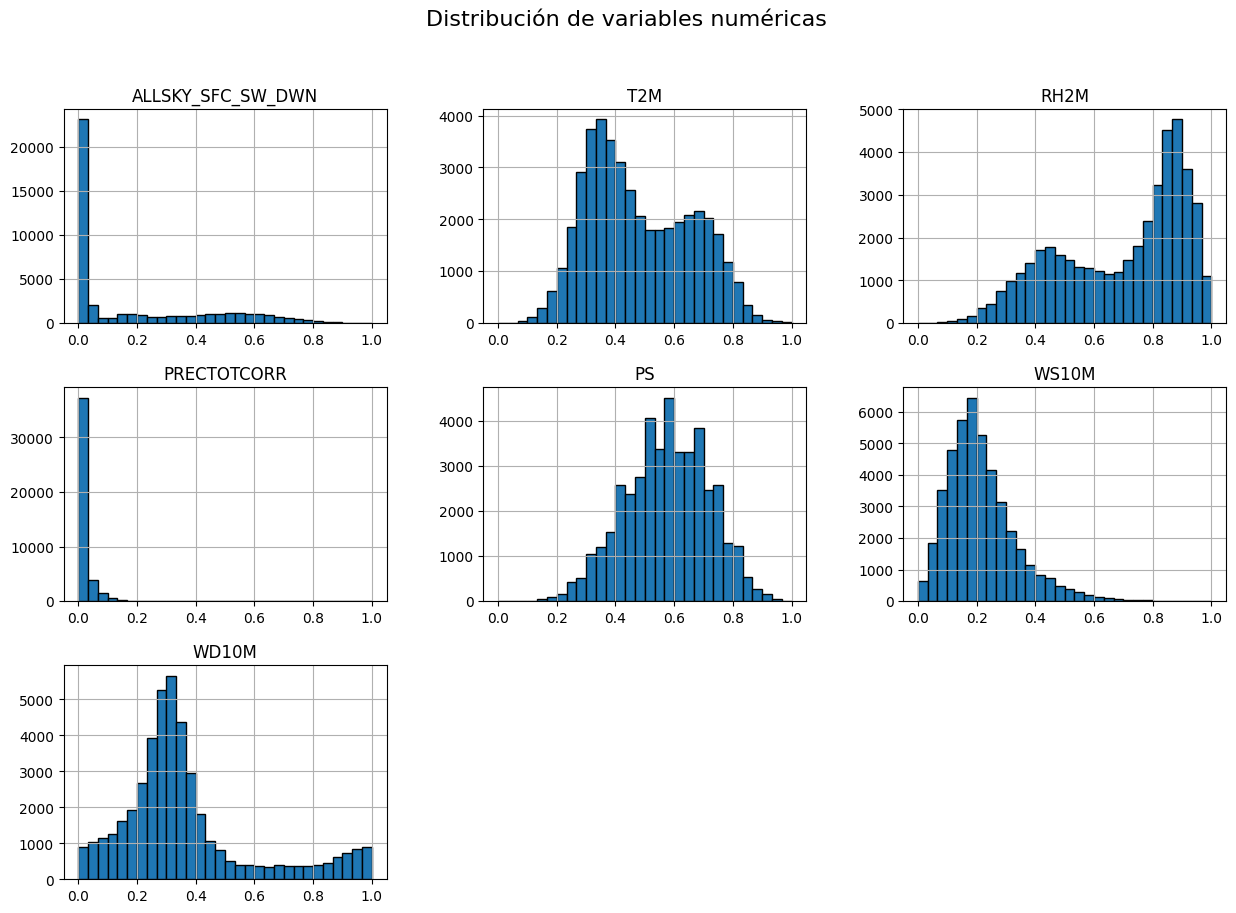

In [ ]:
df_norm[cols_a_evaluar].hist(figsize=(15,10), bins=30, edgecolor='black')
plt.suptitle("Distribución de variables numéricas", fontsize=16)
plt.show()

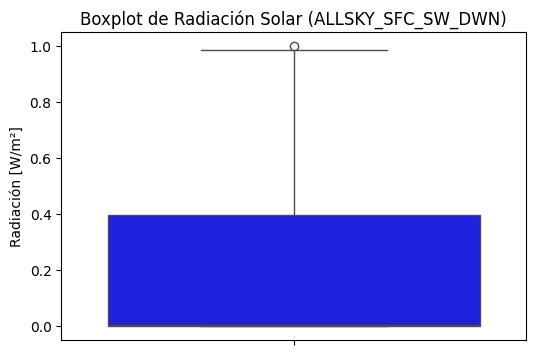

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df_norm['ALLSKY_SFC_SW_DWN'], color='blue')
plt.title('Boxplot de Radiación Solar (ALLSKY_SFC_SW_DWN)')
plt.ylabel('Radiación [W/m²]')
plt.show()

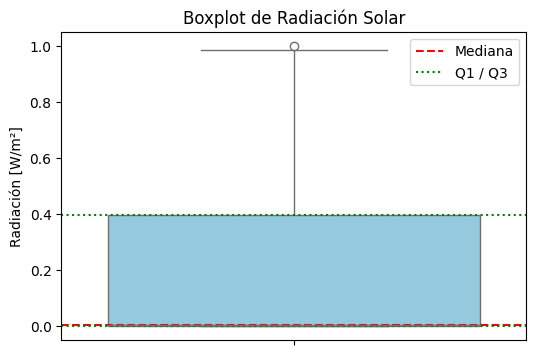

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df_norm['ALLSKY_SFC_SW_DWN'], color='skyblue')

# Agregar líneas de Q1, Q3, mediana
q1 = df_norm['ALLSKY_SFC_SW_DWN'].quantile(0.25)
q3 = df_norm['ALLSKY_SFC_SW_DWN'].quantile(0.75)
med = df_norm['ALLSKY_SFC_SW_DWN'].median()

plt.axhline(med, color='red', linestyle='--', label='Mediana')
plt.axhline(q1, color='green', linestyle=':', label='Q1 / Q3')
plt.axhline(q3, color='green', linestyle=':')

plt.legend()
plt.title('Boxplot de Radiación Solar')
plt.ylabel('Radiación [W/m²]')
plt.show()

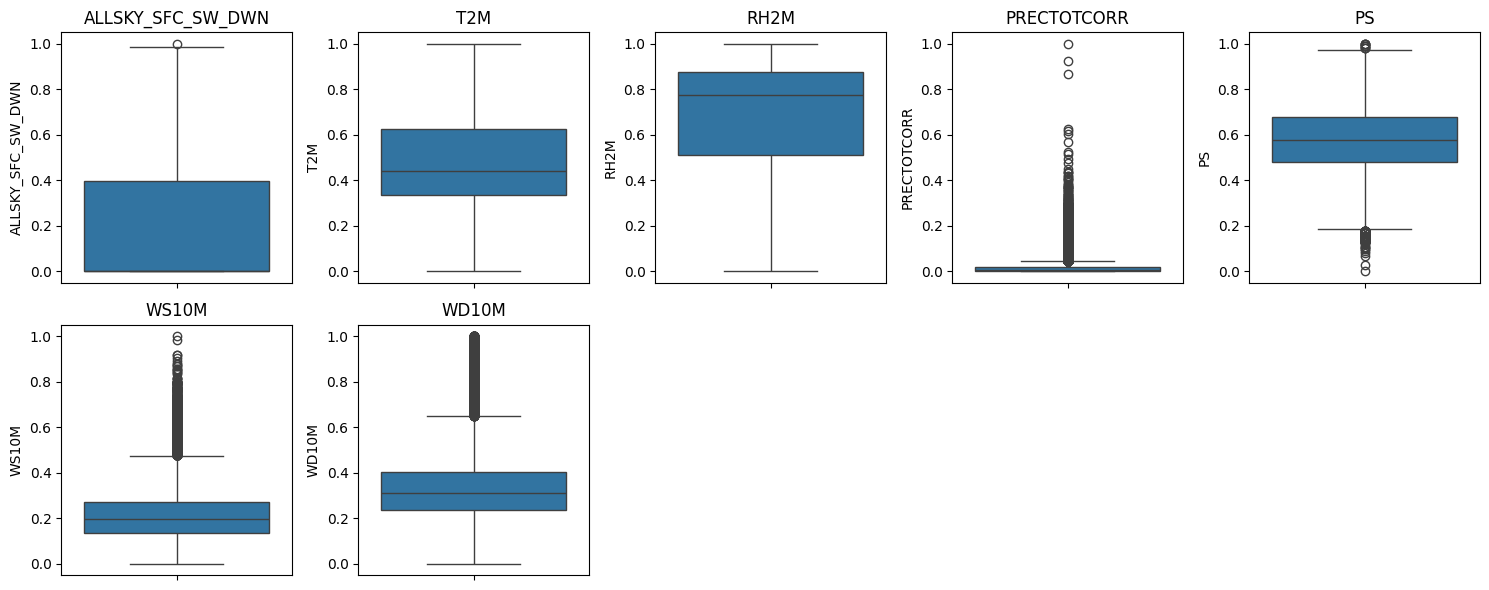

In [ ]:
plt.figure(figsize=(15,6))
for i,col in enumerate(cols_a_evaluar):
    plt.subplot(2, (len(df_norm.columns))//2, i+1)
    sns.boxplot(y=df_norm[col])
    plt.title(col)
plt.tight_layout()
plt.show()

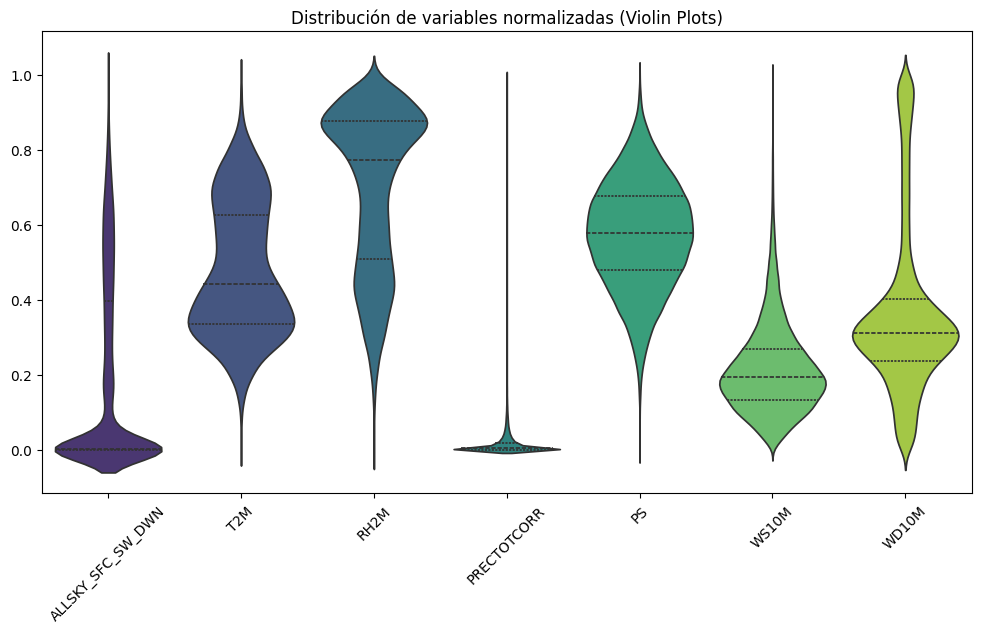

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_norm[cols_a_evaluar], inner="quartile", palette="viridis")
plt.title("Distribución de variables normalizadas (Violin Plots)")
plt.xticks(rotation=45)
plt.show()

Heatmap para correlaciones

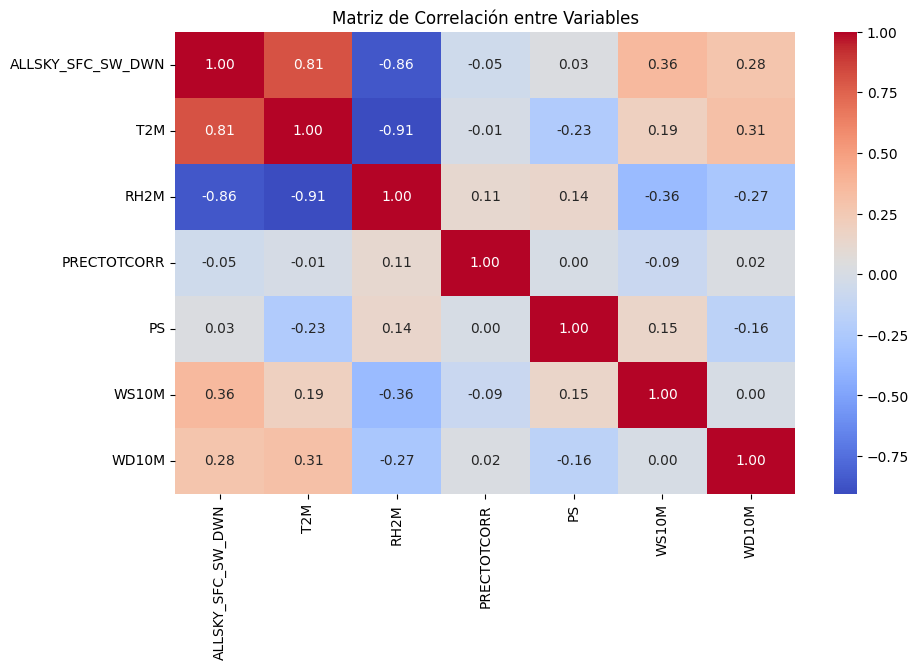

In [ ]:
plt.figure(figsize=(10,6))
corr = df_norm[cols_a_evaluar].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre Variables')
plt.show()

Scaterplot

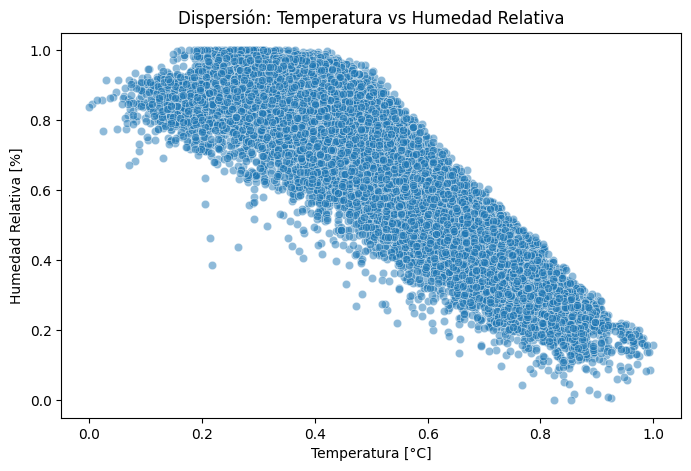

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='T2M', y='RH2M', data=df_norm, alpha=0.5)
plt.title('Dispersión: Temperatura vs Humedad Relativa')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Humedad Relativa [%]')
plt.show()

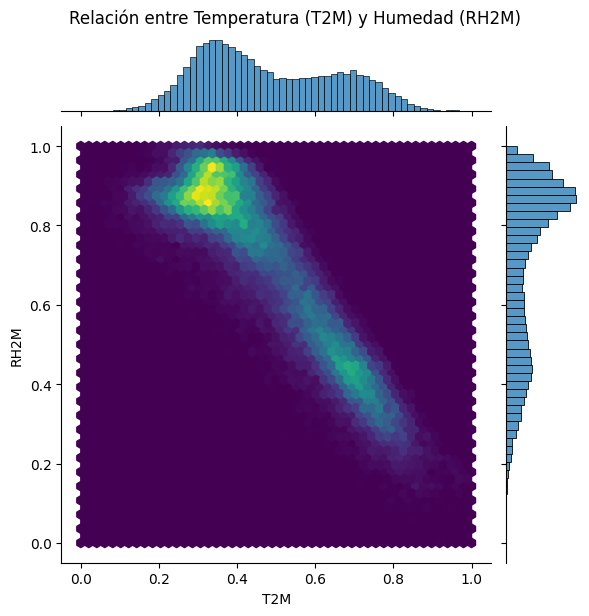

In [ ]:
sns.jointplot(data=df_norm, x="T2M", y="RH2M", kind="hex", cmap="viridis")
plt.suptitle("Relación entre Temperatura (T2M) y Humedad (RH2M)", y=1.02)
plt.show()

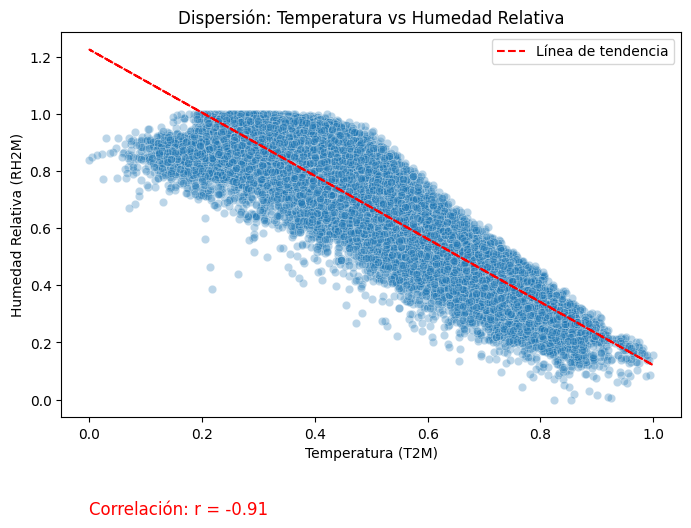

In [ ]:
from scipy.stats import linregress

x = df_norm['T2M']
y = df_norm['RH2M']
r = x.corr(y)
slope, intercept, *_ = linregress(x, y)

plt.figure(figsize=(8,5))
sns.scatterplot(x=x, y=y, alpha=0.3)

# Línea de regresión
plt.plot(x, slope*x + intercept, color='red', linestyle='--', label='Línea de tendencia')

# Texto con r
plt.text(x.min(), y.max()-1.4, f'Correlación: r = {r:.2f}', fontsize=12, color='red')

plt.title('Dispersión: Temperatura vs Humedad Relativa')
plt.xlabel('Temperatura (T2M)')
plt.ylabel('Humedad Relativa (RH2M)')
plt.legend()
plt.show()

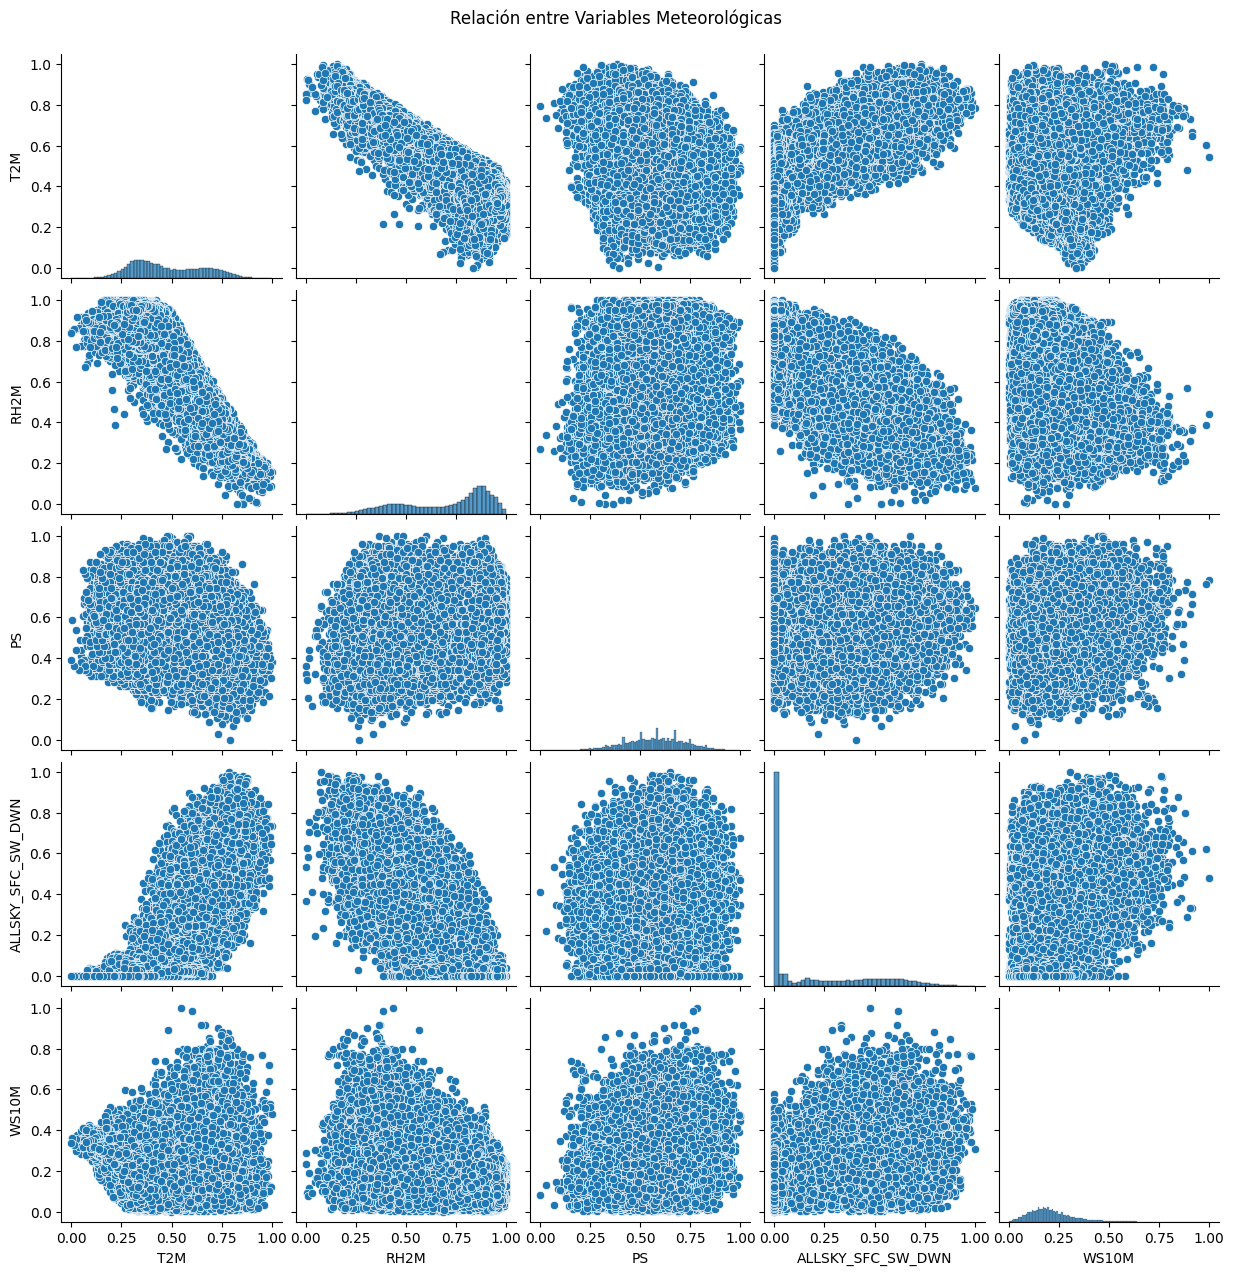

In [ ]:
vars_plot = ['T2M', 'RH2M', 'PS', 'ALLSKY_SFC_SW_DWN', 'WS10M']
sns.pairplot(df_norm[vars_plot])
plt.suptitle('Relación entre Variables Meteorológicas', y=1.02)
plt.show()

# Estadística aplicada a la regresión

In [ ]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan

In [ ]:
cov_matrix = df_norm[['ALLSKY_SFC_SW_DWN', 'T2M']].cov()
print("Matriz de Covarianza:")
print(cov_matrix)

Matriz de Covarianza:
                   ALLSKY_SFC_SW_DWN       T2M
ALLSKY_SFC_SW_DWN           0.064239  0.036307
T2M                         0.036307  0.031106


In [ ]:
# Supuestos de la regresión lineal

X = df_norm[['T2M', 'RH2M', 'WS10M']]
y = df_norm['ALLSKY_SFC_SW_DWN']


X_const = sm.add_constant(X)

modelo = sm.OLS(y, X_const).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:      ALLSKY_SFC_SW_DWN   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                 4.393e+04
Date:                Thu, 21 Aug 2025   Prob (F-statistic):               0.00
Time:                        00:09:23   Log-Likelihood:                 28398.
No. Observations:               43872   AIC:                        -5.679e+04
Df Residuals:                   43868   BIC:                        -5.675e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4322      0.010     45.017      0.0

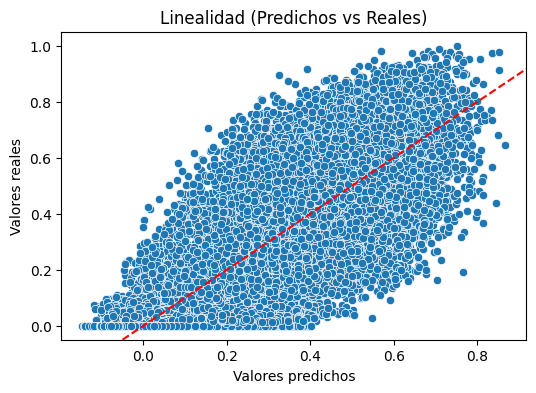

In [ ]:
# Supuesto 1: Linealidad

# Grafica predichos vs reales

y_pred = modelo.fittedvalues
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=y)
plt.xlabel("Valores predichos")
plt.ylabel("Valores reales")
plt.title("Linealidad (Predichos vs Reales)")
plt.axline((0,0), slope=1, color="red", linestyle="--")
plt.show()

In [ ]:
# Supuesto 2: Independencia de errores

dw_stat = durbin_watson(modelo.resid)
print(f"Durbin-Watson: {dw_stat} (Cerca de 2 = sin autocorrelación)")

Durbin-Watson: 0.19250595319768335 (Cerca de 2 = sin autocorrelación)


{'LM Statistic': np.float64(7371.335035316659), 'LM-Test p-value': np.float64(0.0), 'F-Statistic': np.float64(2953.057847413168), 'F-Test p-value': np.float64(0.0)}


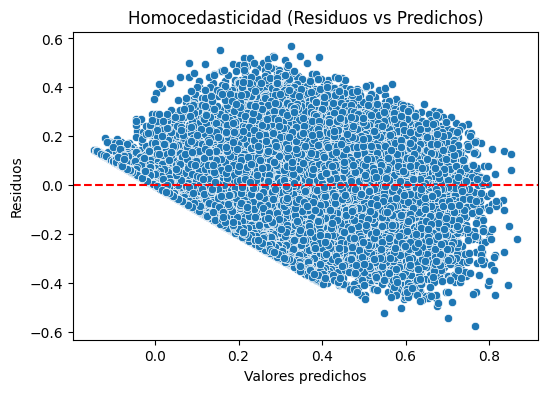

In [ ]:
# Supuesto 3: Homocedasticidad

bp_test = het_breuschpagan(modelo.resid, X_const)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))

# Graficar residuos vs predichos
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=modelo.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores predichos")
plt.ylabel("Residuos")
plt.title("Homocedasticidad (Residuos vs Predichos)")
plt.show()

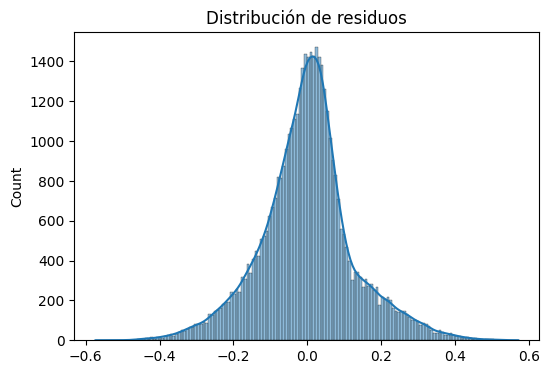

/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 43872.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk: estadístico=0.9828303347212054, p-valor=1.362056097140157e-55


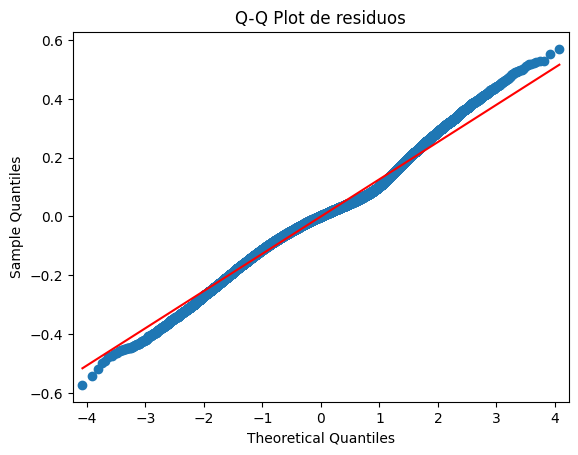

In [ ]:
# Supuesto 4: Normalidad de los residuos

# Histograma y curva normal
plt.figure(figsize=(6,4))
sns.histplot(modelo.resid, kde=True)
plt.title("Distribución de residuos")
plt.show()

# Prueba de Shapiro-Wilk
shapiro_test = stats.shapiro(modelo.resid)
print(f"Shapiro-Wilk: estadístico={shapiro_test[0]}, p-valor={shapiro_test[1]}")

# Q-Q Plot
sm.qqplot(modelo.resid, line='s')
plt.title("Q-Q Plot de residuos")
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import pandas as pd

features = ['ALLSKY_SFC_SW_DWN','T2M','RH2M','PS','WS10M','WD10M']
X = df_norm[features].dropna()
Xc = sm.add_constant(X)

vif = pd.DataFrame({
    'variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
}).sort_values('VIF', ascending=False)
vif

variable        VIF
3                 PS  19.979395
2               RH2M  19.727777
1                T2M  14.482348
0  ALLSKY_SFC_SW_DWN   7.143350
4              WS10M   4.876563
5              WD10M   4.092938

2025-08-13

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold, mutual_info_regression, f_regression
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
plt.rcParams['figure.figsize'] = (7,4)
pd.set_option('display.float_format', lambda x: f'{x:,.6f}')

target = 'ALLSKY_SFC_SW_DWN'

num_feats_base = [
    'T2M','RH2M','PS','WS10M','WD10M',
]

# Usar solo columnas que existan realmente en df_norm
num_feats = [c for c in num_feats_base if c in df_norm.columns]
print("Usar estas features:", num_feats)
print("Target:", target)

df_work = df_norm[num_feats + [target]].copy()
df_work = df_work.dropna(subset=[target])  # garantizar y no perder objetivo

print("Shape antes de dropna:", df_work.shape)
df_work = df_work.dropna()
print("Shape después de dropna:", df_work.shape)
df_work.head(3)

Usar estas features: ['T2M', 'RH2M', 'PS', 'WS10M', 'WD10M']
Target: ALLSKY_SFC_SW_DWN
Shape antes de dropna: (43872, 6)
Shape después de dropna: (43872, 6)


T2M     RH2M       PS    WS10M    WD10M  ALLSKY_SFC_SW_DWN
0 0.329114 0.958046 0.549020 0.172960 0.099778           0.000000
1 0.325570 0.952274 0.500000 0.155907 0.071707           0.000000
2 0.317468 0.957483 0.460784 0.153471 0.049750           0.000000

In [ ]:
# ==== 1. CREACIÓN DE FEATURES ====
df_fe = df_work.copy()

# 1.1 Interacciones que tienen sentido físico
if set(['T2M','RH2M']).issubset(df_fe.columns):
    df_fe['T2M_x_RH2M'] = df_fe['T2M'] * df_fe['RH2M']  # índice simple "calor-humedad"

# 1.2 Términos polinomiales suaves (grado 2) en clima
for col in ['T2M','WS10M']:
    if col in df_fe.columns:
        df_fe[f'{col}_2'] = df_fe[col]**2

print("Columnas después de ingeniería de características:", len(df_fe.columns))
df_fe.head(10)


Columnas después de ingeniería de características: 9


T2M     RH2M       PS    WS10M    WD10M  ALLSKY_SFC_SW_DWN  T2M_x_RH2M  \
0 0.329114 0.958046 0.549020 0.172960 0.099778           0.000000    0.315306   
1 0.325570 0.952274 0.500000 0.155907 0.071707           0.000000    0.310031   
2 0.317468 0.957483 0.460784 0.153471 0.049750           0.000000    0.303970   
3 0.304304 0.962833 0.460784 0.164434 0.058644           0.000000    0.292994   
4 0.293165 0.966915 0.480392 0.175396 0.086715           0.000000    0.283465   
5 0.288101 0.958327 0.500000 0.175396 0.115620           0.000000    0.276095   
6 0.312405 0.952555 0.558824 0.177832 0.148138           0.032374    0.297583   
7 0.408101 0.864142 0.637255 0.221681 0.150361           0.201605    0.352657   
8 0.507848 0.689286 0.686275 0.220463 0.100889           0.423755    0.350053   
9 0.594430 0.566521 0.696078 0.192448 0.036409           0.539737    0.336757   

     T2M_2  WS10M_2  
0 0.108316 0.029915  
1 0.105996 0.024307  
2 0.100786 0.023553  
3 0.092601 0.027038  
4 0.085945 0.030764  
5 0.083002 0.030764  
6 0.097597 0.031624  
7 0.166547 0.049142  
8 0.257910 0.048604  
9 0.353347 0.037036

In [ ]:
# ==== 2.1 ELIMINAR VARIANZA BAJA ====
X = df_fe.drop(columns=[target])
y = df_fe[target].values

vt = VarianceThreshold(threshold=0.0) # quita columnas constantes
X_vt = vt.fit_transform(X)
cols_kept = X.columns[vt.get_support()]
X = pd.DataFrame(X_vt, columns=cols_kept, index=df_fe.index)

print("Features tras VarianceThreshold:", X.shape[1])

# ==== 2.2 RELEVANCIA (Mutual Info y F-test) ====
mi = mutual_info_regression(X, y, random_state=42)
f_vals, f_pvals = f_regression(X, y)

relevancia = pd.DataFrame({
    'feature': X.columns,
    'mutual_info': mi,
    'f_stat': f_vals,
    'f_pval': f_pvals
}).sort_values(['mutual_info','f_stat'], ascending=False)

relevancia.head(12)

Features tras VarianceThreshold: 8


feature  mutual_info         f_stat   f_pval
1        RH2M     0.590742 121,859.933301 0.000000
0         T2M     0.560997  85,034.915433 0.000000
6       T2M_2     0.557431  98,327.403621 0.000000
4       WD10M     0.117897   3,803.817875 0.000000
3       WS10M     0.104216   6,510.830981 0.000000
7     WS10M_2     0.101951   6,905.114405 0.000000
5  T2M_x_RH2M     0.064838     873.743339 0.000000
2          PS     0.057789      37.274991 0.000000

In [ ]:
# ==== 3. VIF: DETECTAR MULTICOLINEALIDAD ====
def compute_vif(df_features: pd.DataFrame):
    Xv = df_features.values
    vif_list = []
    for i in range(Xv.shape[1]):
        vif_list.append(variance_inflation_factor(Xv, i))
    return pd.DataFrame({'variable': df_features.columns, 'VIF': vif_list}).sort_values('VIF', ascending=False)

X_for_vif = X.copy()
vif0 = compute_vif(X_for_vif)
vif0

# ==== 3.1 ELIMINACIÓN ITERATIVA POR UMBRAL VIF ====
def drop_high_vif(df_features, thresh=10.0, max_iter=10):
    dropped = []
    X_iter = df_features.copy()
    for _ in range(max_iter):
        vif_df = compute_vif(X_iter)
        worst = vif_df.iloc[0]
        if worst['VIF'] <= thresh:  # listo
            return X_iter, dropped, vif_df
        # eliminar la peor
        col_to_drop = worst['variable']
        dropped.append((col_to_drop, worst['VIF']))
        X_iter = X_iter.drop(columns=[col_to_drop])
    return X_iter, dropped, compute_vif(X_iter)

X_reduced, dropped_cols, final_vif = drop_high_vif(X_for_vif, thresh=10.0, max_iter=12)
print("Eliminadas por VIF>10:", dropped_cols)
final_vif

Eliminadas por VIF>10: [('T2M', np.float64(588.2726749243127)), ('T2M_x_RH2M', np.float64(39.47507091384878)), ('WS10M', np.float64(37.08261812252627)), ('PS', np.float64(15.53830166516647))]


variable      VIF
1    WD10M 3.940229
2    T2M_2 3.140965
0     RH2M 2.561131
3  WS10M_2 1.796765

In [ ]:
# ==== 4. TRAIN/TEST SPLIT ====
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# ==== 4.1 FUNCIÓN DE EVALUACIÓN ====
def eval_model(nombre, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # cálculo manual
    return {
        'modelo': nombre,
        'R2': r2_score(y_true, y_pred),
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': rmse
    }

# ==== 4.2 COMPARAR ESCALADORES CON REGRESIÓN LINEAL ====
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

res = []
for name, scaler in scalers.items():
    pipe = Pipeline(steps=[
        ('scaler', scaler),
        ('lr', LinearRegression())
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    res.append(eval_model(f'LinearReg + {name}', y_test, y_pred))

pd.DataFrame(res).sort_values('R2', ascending=False)

modelo       R2      MAE     RMSE
0  LinearReg + StandardScaler 0.755199 0.090608 0.124962
1    LinearReg + MinMaxScaler 0.755199 0.090608 0.124962
2    LinearReg + RobustScaler 0.755199 0.090608 0.124962

modelo       R2      MAE     RMSE
0  LinearReg + StandardScaler 0.755199 0.090608 0.124962
1    LinearReg + MinMaxScaler 0.755199 0.090608 0.124962
2    LinearReg + RobustScaler 0.755199 0.090608 0.124962

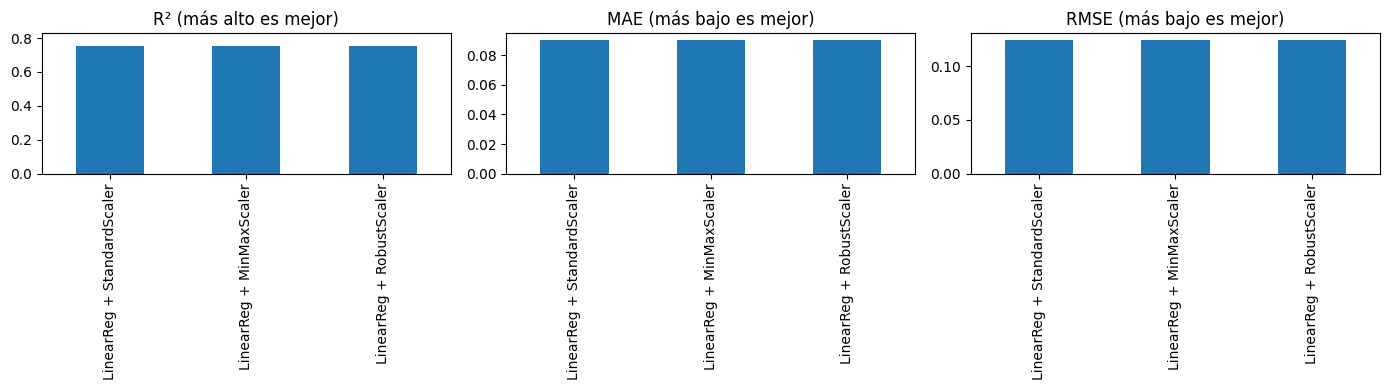

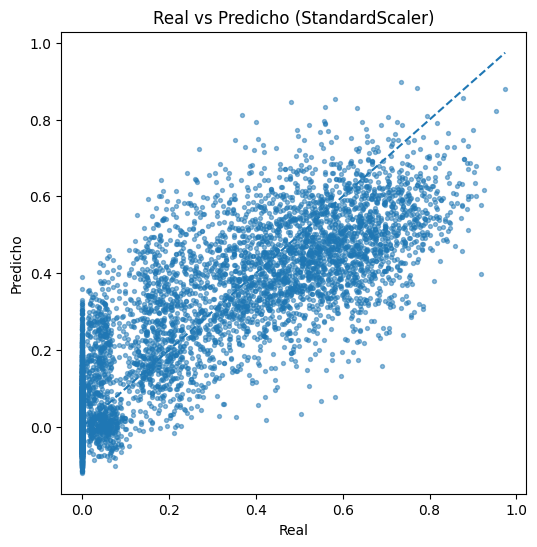

In [ ]:
# === Resultados de tu bloque ===
res_df = pd.DataFrame(res).sort_values('R2', ascending=False)
display(res_df)

# === (a) Barras comparando R2 / MAE / RMSE ===
fig, ax = plt.subplots(1, 3, figsize=(14,4))

res_df.plot(x='modelo', y='R2', kind='bar', ax=ax[0], legend=False)
ax[0].set_title('R² (más alto es mejor)'); ax[0].set_xlabel(''); ax[0].set_ylim(0, max(0.01, res_df['R2'].max()*1.1))

res_df.plot(x='modelo', y='MAE', kind='bar', ax=ax[1], legend=False)
ax[1].set_title('MAE (más bajo es mejor)'); ax[1].set_xlabel('')

res_df.plot(x='modelo', y='RMSE', kind='bar', ax=ax[2], legend=False)
ax[2].set_title('RMSE (más bajo es mejor)'); ax[2].set_xlabel('')

plt.tight_layout(); plt.show()

# === (b) Real vs Predicho del mejor pipeline ===
best_row = res_df.iloc[0]
best_name = best_row['modelo'].split(' + ')[1]   # extraer el escalador
best_scaler = {'StandardScaler': StandardScaler(), 'MinMaxScaler': MinMaxScaler(), 'RobustScaler': RobustScaler()}[best_name]

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

best_pipe = Pipeline([('scaler', best_scaler), ('lr', LinearRegression())]).fit(X_train, y_train)
y_hat = best_pipe.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_hat, s=8, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--')
plt.xlabel('Real'); plt.ylabel('Predicho'); plt.title(f'Real vs Predicho ({best_name})')
plt.show()

2025-08-15

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, RobustScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor

from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import VarianceThreshold, mutual_info_regression, f_regression

from sklearn.ensemble import RandomForestRegressor

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.model_selection import KFold
from sklearn.ensemble import HistGradientBoostingRegressor

plt.rcParams['figure.figsize'] = (7,4)
pd.set_option('display.float_format', lambda x: f'{x:,.6f}')

In [ ]:
# ---- Definir target y asegurar features cuadráticas ----
#target = 'ALLSKY_SFC_SW_DWN'

#df = df_norm.copy()

#  if 'T2M' in df.columns and 'T2M_2' not in df.columns:
#  df['T2M_2'] = df['T2M']**2
#if 'WS10M' in df.columns and 'WS10M_2' not in df.columns:
#df['WS10M_2'] = df['WS10M']**2

#features = ['WD10M','T2M_2','RH2M','WS10M_2']
#features = [c for c in features if c in df.columns] # por si falta alguna

#data = df[features + [target]].dropna()
#X = data[features].copy()
#y = data[target].values

#X_train, X_test, y_train, y_test = train_test_split(
#X, y, test_size=0.2, random_state=42
#)


# ---- Definir target y asegurar features cuadráticas ----
target = 'ALLSKY_SFC_SW_DWN'

df = df_norm.copy()

if 'T2M' in df.columns and 'T2M_2' not in df.columns:
    df['T2M_2'] = df['T2M']**2
if 'WS10M' in df.columns and 'WS10M_2' not in df.columns:
    df['WS10M_2'] = df['WS10M']**2

features = ['WD10M','T2M_2','RH2M','WS10M_2']
features = [c for c in features if c in df.columns] # por si falta alguna

data = df[features + [target]].dropna()
X = data[features].copy()
y = data[target].values

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42
)

In [ ]:
def eval_model(nombre, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # compatible con cualquier versión
    return {
        'modelo': nombre,
        'R2': r2_score(y_true, y_pred),
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': rmse
    }

In [ ]:
pipelines = {
    'Linear (std)': Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())]),
    'RidgeCV (std)': Pipeline([('scaler', StandardScaler()), ('model', RidgeCV(alphas=(0.1,1,10,100)))]),
    'LassoCV (std)': Pipeline([('scaler', StandardScaler()), ('model', LassoCV(cv=5, random_state=42, max_iter=5000))]),
    'KNN (std)': Pipeline([('scaler', StandardScaler()), ('model', KNeighborsRegressor(n_neighbors=5))]),
}

In [ ]:
#Entrenamiento y evaluación

resultados = []
preds = {}  # para graficar después

for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    resultados.append(eval_model(name, y_test, y_pred))
    preds[name] = y_pred

res_df = pd.DataFrame(resultados).sort_values('R2', ascending=False)
display(res_df)

modelo       R2      MAE     RMSE
3      KNN (std) 0.778602 0.070394 0.118839
1  RidgeCV (std) 0.755205 0.090603 0.124961
0   Linear (std) 0.755199 0.090608 0.124962
2  LassoCV (std) 0.755185 0.090603 0.124966

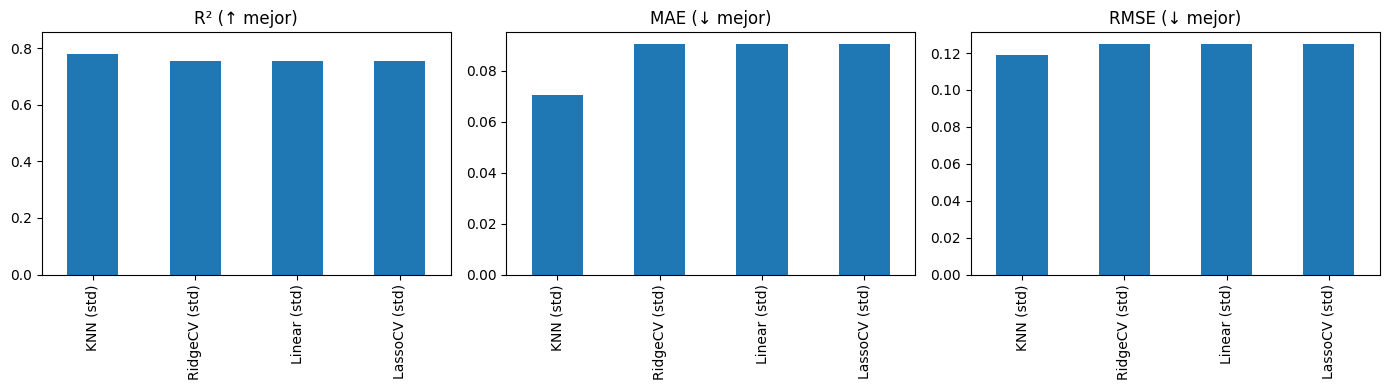

In [ ]:
#Gráfica de métricas:

fig, ax = plt.subplots(1,3, figsize=(14,4))
res_df.plot(x='modelo', y='R2', kind='bar', ax=ax[0], legend=False)
ax[0].set_title('R² (↑ mejor)'); ax[0].set_xlabel(''); ax[0].set_ylim(0, max(0.01, res_df['R2'].max()*1.1))

res_df.plot(x='modelo', y='MAE', kind='bar', ax=ax[1], legend=False)
ax[1].set_title('MAE (↓ mejor)'); ax[1].set_xlabel('')

res_df.plot(x='modelo', y='RMSE', kind='bar', ax=ax[2], legend=False)
ax[2].set_title('RMSE (↓ mejor)'); ax[2].set_xlabel('')

plt.tight_layout(); plt.show()

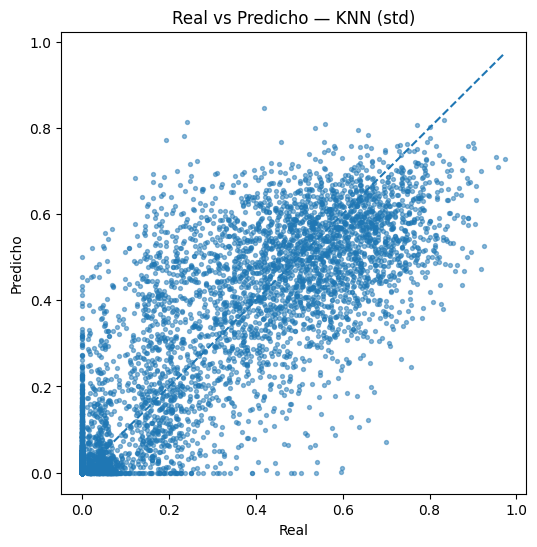

In [ ]:
# Predicción vs real:

best_name = res_df.iloc[0]['modelo']
y_hat_best = preds[best_name]

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_hat_best, s=8, alpha=0.5)
m, M = y_test.min(), y_test.max()
plt.plot([m,M],[m,M],'--')
plt.xlabel('Real'); plt.ylabel('Predicho')
plt.title(f'Real vs Predicho — {best_name}')
plt.show()

In [ ]:
# Diccionario de colores para cada modelo
colores = {
    'Baseline Linear (std) — sin FE': 'blue',
    'KNN (std)': 'orange',
    'RidgeCV (std)': 'green',
    'Linear (std)': 'red',
    'LassoCV (std)': 'purple',
}

# Diccionario para almacenar las predicciones
preds = {}

# Generar predicciones para todos los modelos
for nombre, modelo in modelos:
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    preds[nombre] = y_pred

# Graficar todos en una sola figura
plt.figure(figsize=(7,7))
for nombre, y_hat in preds.items():
    plt.scatter(y_test, y_hat, s=10, alpha=0.5, label=nombre, color=colores.get(nombre, None))

# Línea de referencia
m, M = y_test.min(), y_test.max()
plt.plot([m, M], [m, M], '--', color='black')

plt.xlabel('Real')
plt.ylabel('Predicho')
plt.title('Real vs Predicho — Todos los modelos')
plt.legend()
plt.show()

NameError: name 'modelos' is not defined

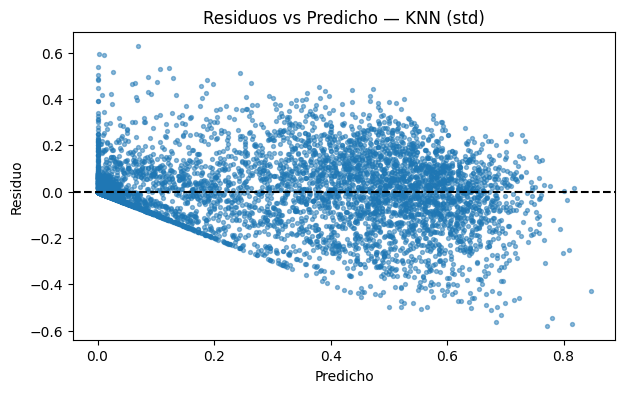

In [ ]:
#Residuos

resid = y_test - y_hat_best
plt.figure(figsize=(7,4))
plt.scatter(y_hat_best, resid, s=8, alpha=0.5)
plt.axhline(0, ls='--', color='k')
plt.xlabel('Predicho'); plt.ylabel('Residuo')
plt.title(f'Residuos vs Predicho — {best_name}')
plt.show()

In [ ]:
best_pipe = pipelines[best_name]
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_r2 = cross_val_score(best_pipe, X, y, scoring='r2', cv=cv)
print(f'CV R² ({best_name}): mean={cv_r2.mean():.4f} ± {cv_r2.std():.4f}')

CV R² (KNN (std)): mean=0.7811 ± 0.0019


In [ ]:
#Comparar con modelo sin ingeniería de carcaterísticas

base_feats = [c for c in ['WD10M','T2M','RH2M','WS10M'] if c in df.columns]
base = df[base_feats + [target]].dropna()
Xb = base[base_feats].copy()
yb = base[target].values

# usar el MISMO split por índices:
Xb_train = Xb.loc[X_train.index]
Xb_test  = Xb.loc[X_test.index]
yb_train = yb[[base.index.get_indexer([i])[0] for i in X_train.index]]
yb_test  = yb[[base.index.get_indexer([i])[0] for i in X_test.index]]

baseline_pipe = Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())]).fit(Xb_train, yb_train)
yb_pred = baseline_pipe.predict(Xb_test)

baseline_res = eval_model('Baseline Linear (std) — sin FE', yb_test, yb_pred)
display(pd.DataFrame([baseline_res]))

# Comparativa
comparativa = pd.concat([pd.DataFrame([baseline_res]), res_df], ignore_index=True).sort_values('R2', ascending=False)
display(comparativa)

modelo       R2      MAE     RMSE
0  Baseline Linear (std) — sin FE 0.753386 0.092423 0.125424

modelo       R2      MAE     RMSE
1                       KNN (std) 0.778602 0.070394 0.118839
2                   RidgeCV (std) 0.755205 0.090603 0.124961
3                    Linear (std) 0.755199 0.090608 0.124962
4                   LassoCV (std) 0.755185 0.090603 0.124966
0  Baseline Linear (std) — sin FE 0.753386 0.092423 0.125424

In [ ]:
# ===== Función para evaluar =====
def eval_model(nombre, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return {
        'modelo': nombre,
        'R2': r2_score(y_true, y_pred),
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': rmse
    }

# ===== Variables seleccionadas =====
features = ['WD10M', 'T2M_2', 'RH2M', 'WS10M_2']  # las de menor VIF
target = 'ALLSKY_SFC_SW_DWN'  # radiación solar

X = df[features]
y = df[target]

# ===== Train/Test Split =====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===== Modelos a probar =====
modelos = [
    ('Baseline Linear (std) — sin FE', Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])),
    ('KNN (std)', Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsRegressor(n_neighbors=5))])),
    ('RidgeCV (std)', Pipeline([('scaler', StandardScaler()), ('ridge', RidgeCV(alphas=np.logspace(-3,3,50)))])),
    ('Linear (std)', Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])),
    ('LassoCV (std)', Pipeline([('scaler', StandardScaler()), ('lasso', LassoCV(alphas=np.logspace(-3,3,50), max_iter=5000))])),
    ('HistGradientBoosting (avanzado)', HistGradientBoostingRegressor(random_state=42))
]

# ===== Entrenar y evaluar =====
res = []
for nombre, modelo in modelos:
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    res.append(eval_model(nombre, y_test, y_pred))

# ===== Mostrar tabla =====
res_df = pd.DataFrame(res).sort_values('R2', ascending=False)
res_df

modelo       R2      MAE     RMSE
5  HistGradientBoosting (avanzado) 0.811684 0.067171 0.109601
1                        KNN (std) 0.778602 0.070394 0.118839
2                    RidgeCV (std) 0.755203 0.090605 0.124961
0   Baseline Linear (std) — sin FE 0.755199 0.090608 0.124962
3                     Linear (std) 0.755199 0.090608 0.124962
4                    LassoCV (std) 0.755089 0.090603 0.124990

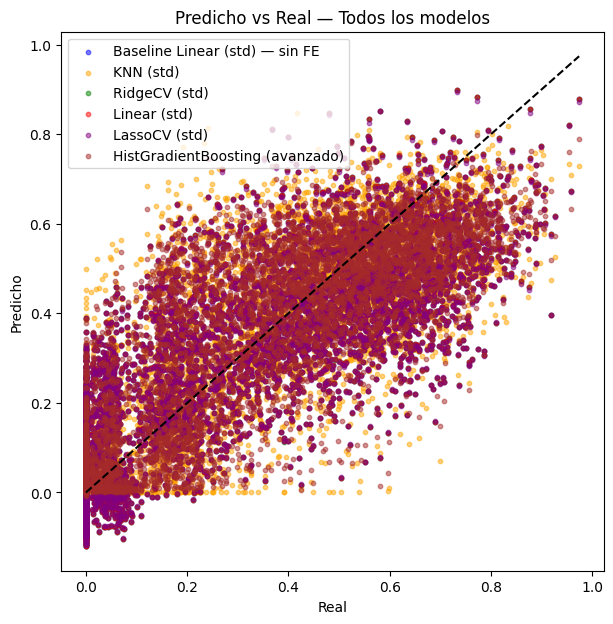

In [ ]:
colores = {
    'Baseline Linear (std) — sin FE': 'blue',
    'KNN (std)': 'orange',
    'RidgeCV (std)': 'green',
    'Linear (std)': 'red',
    'LassoCV (std)': 'purple',
    'HistGradientBoosting (avanzado)': 'brown'
}

plt.figure(figsize=(7,7))

for nombre, modelo in modelos:
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    plt.scatter(y_test, y_pred, s=10, alpha=0.5,
                label=nombre, color=colores.get(nombre, None))

# Línea de referencia
m, M = y_test.min(), y_test.max()
plt.plot([m, M], [m, M], '--', color='black')

plt.xlabel('Real')
plt.ylabel('Predicho')
plt.title('Predicho vs Real — Todos los modelos')
plt.legend()
plt.show()

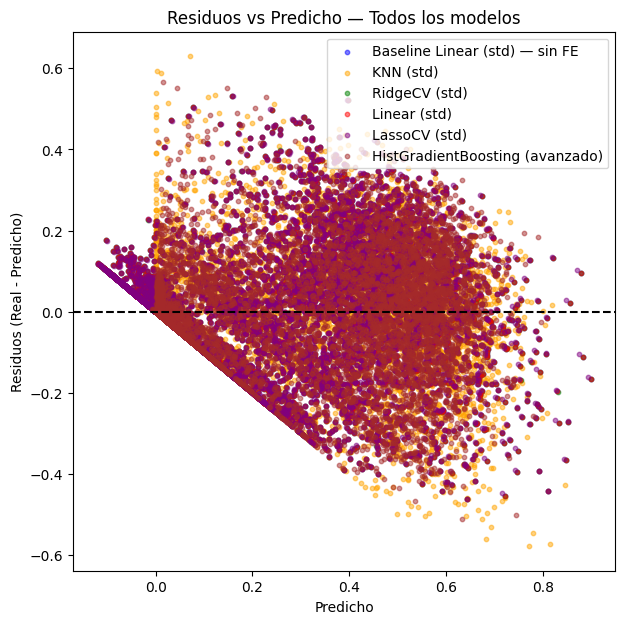

In [ ]:
plt.figure(figsize=(7,7))

for nombre, modelo in modelos:
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    residuos = y_test - y_pred
    plt.scatter(y_pred, residuos, s=10, alpha=0.5,
                label=nombre, color=colores.get(nombre, None))

plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicho')
plt.ylabel('Residuos (Real - Predicho)')
plt.title('Residuos vs Predicho — Todos los modelos')
plt.legend()
plt.show()

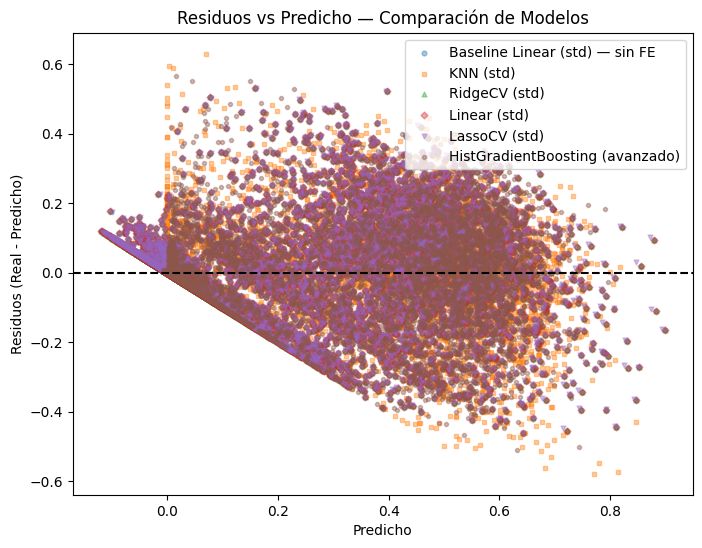

In [ ]:
# Paleta y marcadores
colores = plt.cm.tab10.colors
marcadores = ['o', 's', '^', 'D', 'v', 'P']

plt.figure(figsize=(8,6))

for i, (nombre, modelo) in enumerate(modelos):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    residuos = y_test - y_pred
    plt.scatter(y_pred, residuos,
                s=12, alpha=0.4,
                color=colores[i % len(colores)],
                marker=marcadores[i % len(marcadores)],
                label=nombre)

plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicho')
plt.ylabel('Residuos (Real - Predicho)')
plt.title('Residuos vs Predicho — Comparación de Modelos')
plt.legend()
plt.show()

2025-08-20

In [ ]:
!pip -q install xgboost tensorflow==2.*

In [ ]:
from xgboost import XGBRegressor
import tensorflow as tf
from tensorflow import keras

np.random.seed(42)
tf.random.set_seed(42)

plt.rcParams['figure.figsize'] = (7,4)
pd.set_option('display.float_format', lambda x: f'{x:,.6f}')

In [ ]:
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)

print("Features:", features)
print("Shapes -> X_train:", X_train.shape, "| X_test:", X_test.shape)

Features: ['WD10M', 'T2M_2', 'RH2M', 'WS10M_2']
Shapes -> X_train: (35097, 4) | X_test: (8775, 4)


In [ ]:
def eval_reg(nombre, y_true, y_pred):
    rmse = float(np.sqrt(((y_true - y_pred)**2).mean()))
    return {'modelo': nombre,
            'R2': float(r2_score(y_true, y_pred)),
            'MAE': float(mean_absolute_error(y_true, y_pred)),
            'RMSE': rmse}

def barras_metricas(dfm, titulo='Comparación de modelos'):
    fig, ax = plt.subplots(1,3, figsize=(14,4))
    dfm.plot(x='modelo', y='R2', kind='bar', ax=ax[0], legend=False)
    ax[0].set_title('R² (↑ mejor)'); ax[0].set_xlabel('')
    ax[0].set_ylim(0, max(0.01, dfm['R2'].max()*1.1))
    dfm.plot(x='modelo', y='MAE', kind='bar', ax=ax[1], legend=False)
    ax[1].set_title('MAE (↓ mejor)'); ax[1].set_xlabel('')
    dfm.plot(x='modelo', y='RMSE', kind='bar', ax=ax[2], legend=False)
    ax[2].set_title('RMSE (↓ mejor)'); ax[2].set_xlabel('')
    fig.suptitle(titulo); plt.tight_layout(); plt.show()

def scatter_real_pred(y_true, y_pred, label='Modelo'):
    plt.figure(figsize=(6,6))
    plt.scatter(y_true, y_pred, s=8, alpha=0.5)
    m, M = float(np.min(y_true)), float(np.max(y_true))
    plt.plot([m,M], [m,M], '--', lw=1, color='k')
    plt.xlabel('Real'); plt.ylabel('Predicho'); plt.title(f'Real vs Predicho — {label}')
    plt.show()

def residuos_plot(y_true, y_pred, label='Modelo'):
    resid = y_true - y_pred
    plt.figure(figsize=(7,4))
    plt.scatter(y_pred, resid, s=8, alpha=0.5)
    plt.axhline(0, ls='--', color='k')
    plt.xlabel('Predicho'); plt.ylabel('Residuo'); plt.title(f'Residuo vs Predicho — {label}')
    plt.show()


In [ ]:
resultados_avanz = []
preds_avanz = {}

In [ ]:
# 1) XGBoost

xgb_model = XGBRegressor(
    n_estimators=1200,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1,
    eval_metric='rmse'   # métrica para el log, no hace early stopping
)

# Algunos xgboost no aceptan 'verbose' o 'eval_set' de la misma forma; probamos degradar.
try:
    xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
except TypeError:
    try:
        xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)])
    except TypeError:
        xgb_model.fit(X_train, y_train)

y_hat_xgb = xgb_model.predict(X_test)
resultados_avanz.append(eval_reg('XGBoost', y_test, y_hat_xgb))
preds_avanz['XGBoost'] = y_hat_xgb

In [ ]:
# 2) MLP
def build_mlp(input_dim):
    model = keras.Sequential([
        keras.layers.Input(shape=(input_dim,)),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer=keras.optimizers.Adam(1e-3), loss='mse')
    return model

mlp = build_mlp(X_train_s.shape[1])
cb_es = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss')
cb_rlr = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-5)

hist_mlp = mlp.fit(
    X_train_s, y_train,
    validation_data=(X_test_s, y_test),
    epochs=60, batch_size=256, verbose=0,
    callbacks=[cb_es, cb_rlr]
)
y_hat_mlp = mlp.predict(X_test_s, verbose=0).ravel()
resultados_avanz.append(eval_reg('MLP', y_test, y_hat_mlp))
preds_avanz['MLP'] = y_hat_mlp

In [ ]:
# 3) DNN
def build_dnn(input_dim):
    inp = keras.layers.Input(shape=(input_dim,))
    x = keras.layers.Dense(128)(inp)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Dropout(0.2)(x)
    x = keras.layers.Dense(64)(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Dropout(0.2)(x)
    x = keras.layers.Dense(32, activation='relu')(x)
    out = keras.layers.Dense(1)(x)
    model = keras.Model(inp, out)
    model.compile(optimizer=keras.optimizers.Adam(1e-3), loss='mse')
    return model

dnn = build_dnn(X_train_s.shape[1])
hist_dnn = dnn.fit(
    X_train_s, y_train,
    validation_data=(X_test_s, y_test),
    epochs=80, batch_size=128, verbose=0,
    callbacks=[cb_es, cb_rlr]
)
y_hat_dnn = dnn.predict(X_test_s, verbose=0).ravel()
resultados_avanz.append(eval_reg('DNN', y_test, y_hat_dnn))
preds_avanz['DNN'] = y_hat_dnn


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

# 4) ExtraTrees

etr = ExtraTreesRegressor(
    n_estimators=800,
    max_features=1.0,
    random_state=42,
    n_jobs=-1
)
etr.fit(X_train, y_train)
y_hat_etr = etr.predict(X_test)
resultados_avanz.append(eval_reg('ExtraTrees', y_test, y_hat_etr))
preds_avanz['ExtraTrees'] = y_hat_etr

In [ ]:
# Tabla avanzados
res_avanz_df = pd.DataFrame(resultados_avanz).sort_values('R2', ascending=False)
display(res_avanz_df)

modelo       R2      MAE     RMSE
2         DNN 0.811647 0.067868 0.109612
1         MLP 0.809713 0.067956 0.110173
3  ExtraTrees 0.800985 0.068943 0.112672
0     XGBoost 0.797116 0.069287 0.113761

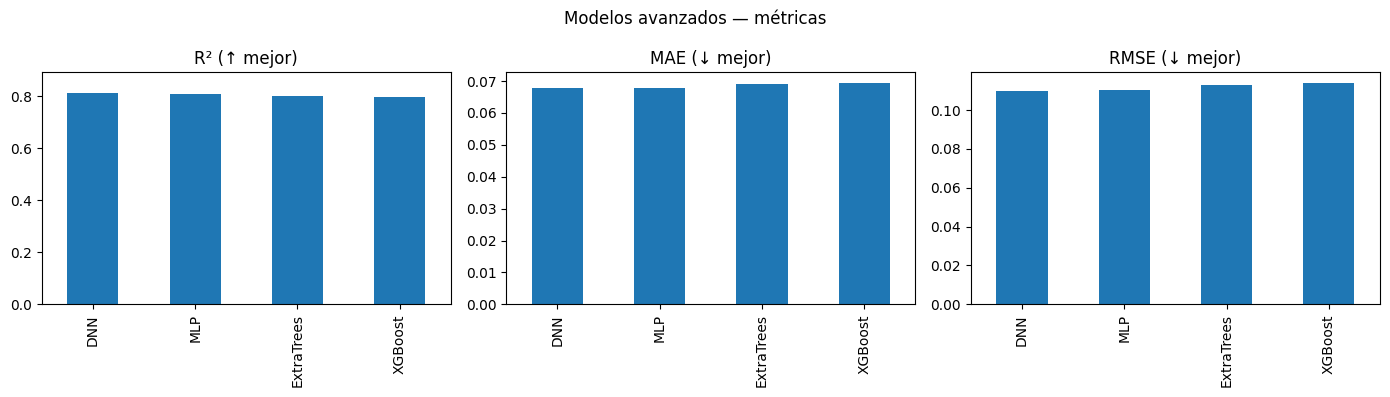

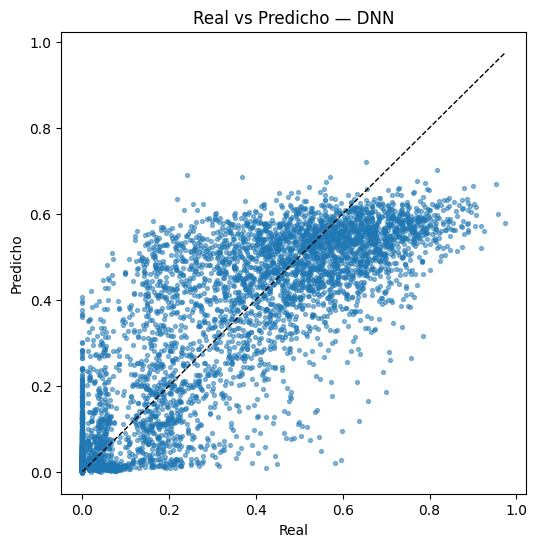

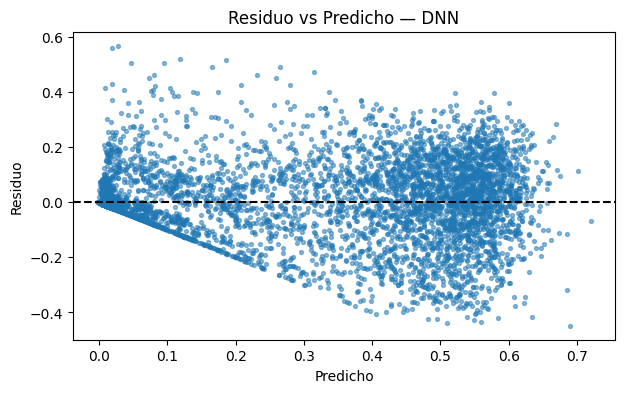

In [ ]:
# Gráficas avanzados
barras_metricas(res_avanz_df, titulo='Modelos avanzados — métricas')
best_adv_name = res_avanz_df.iloc[0]['modelo']
scatter_real_pred(y_test, preds_avanz[best_adv_name], best_adv_name)
residuos_plot(y_test, preds_avanz[best_adv_name], best_adv_name)

modelo       R2      MAE     RMSE
4   RandomForest 0.803422 0.068318 0.111980
3      KNN (std) 0.802209 0.067765 0.112325
1  RidgeCV (std) 0.755203 0.090605 0.124961
0   Linear (std) 0.755199 0.090608 0.124962
2  LassoCV (std) 0.755089 0.090603 0.124990

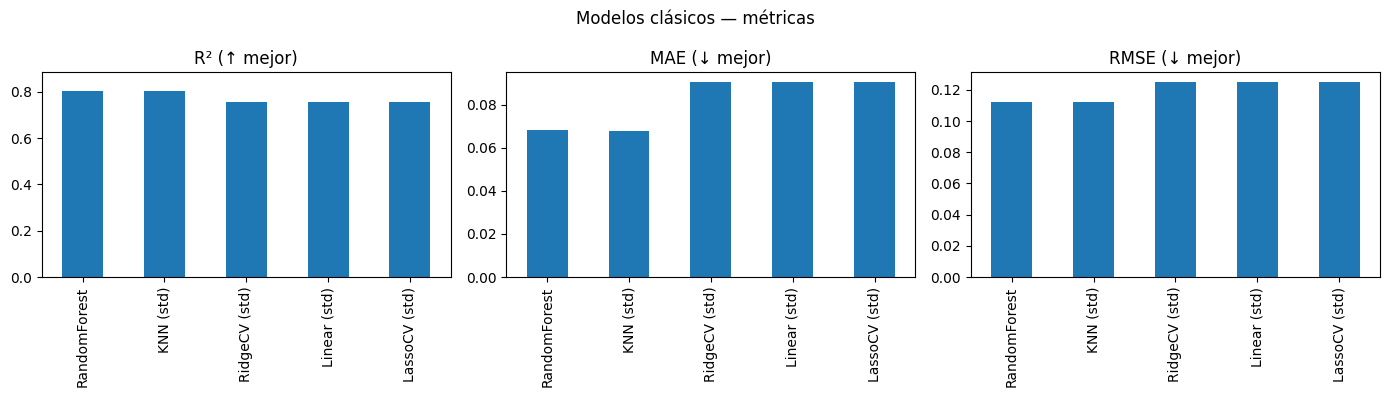

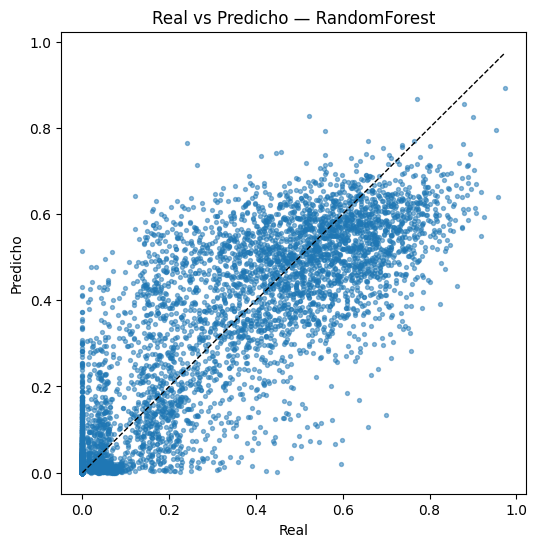

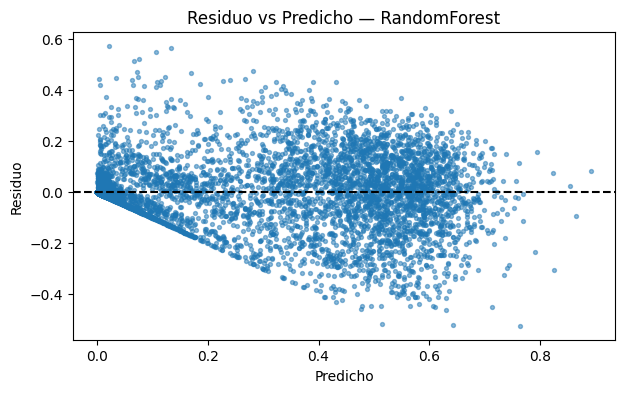

In [ ]:
resultados_clas = []
preds_clas = {}

clasicos = {
    'Linear (std)': Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())]),
    'RidgeCV (std)': Pipeline([('scaler', StandardScaler()), ('model', RidgeCV(alphas=np.logspace(-3,3,50)))]),
    'LassoCV (std)': Pipeline([('scaler', StandardScaler()), ('model', LassoCV(alphas=np.logspace(-3,3,50), max_iter=5000, random_state=42))]),
    'KNN (std)': Pipeline([('scaler', StandardScaler()), ('model', KNeighborsRegressor(n_neighbors=15))]),
    'RandomForest': RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1)
}

for name, model in clasicos.items():
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    resultados_clas.append(eval_reg(name, y_test, y_hat))
    preds_clas[name] = y_hat

res_clas_df = pd.DataFrame(resultados_clas).sort_values('R2', ascending=False)
display(res_clas_df)

barras_metricas(res_clas_df, titulo='Modelos clásicos — métricas')

best_clas_name = res_clas_df.iloc[0]['modelo']
scatter_real_pred(y_test, preds_clas[best_clas_name], best_clas_name)
residuos_plot(y_test, preds_clas[best_clas_name], best_clas_name)

modelo       R2      MAE     RMSE
0  RandomForest 0.803422 0.068318 0.111980
1           DNN 0.811647 0.067868 0.109612

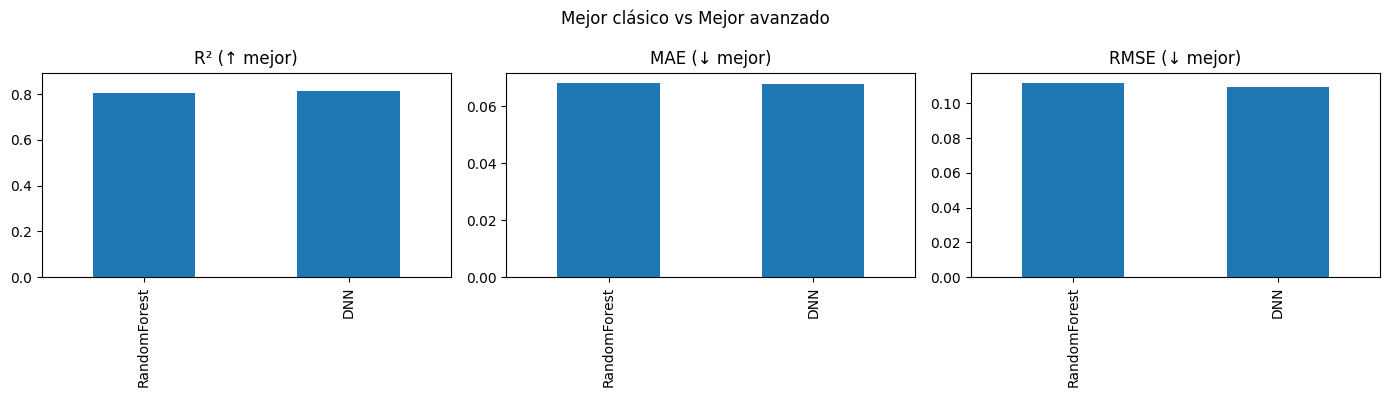

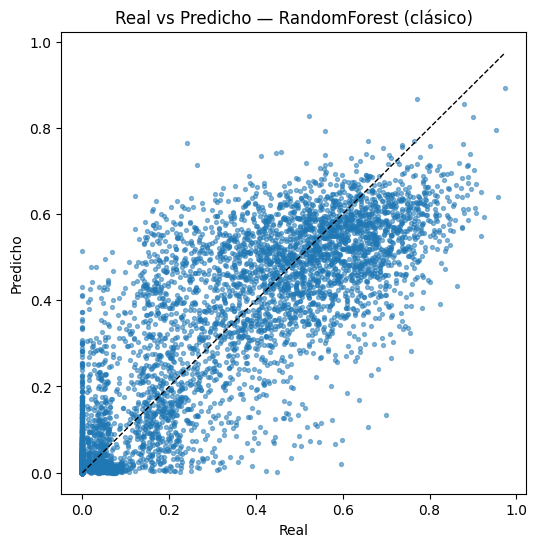

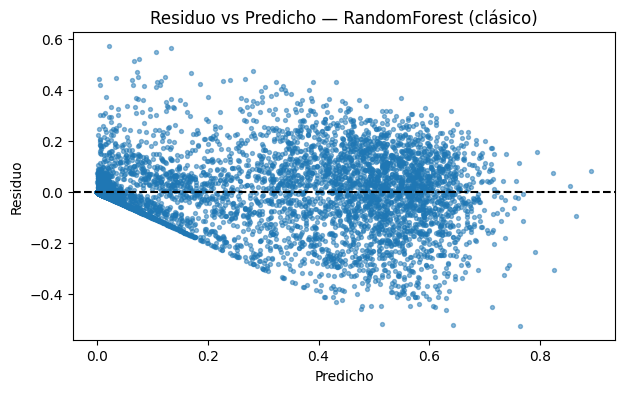

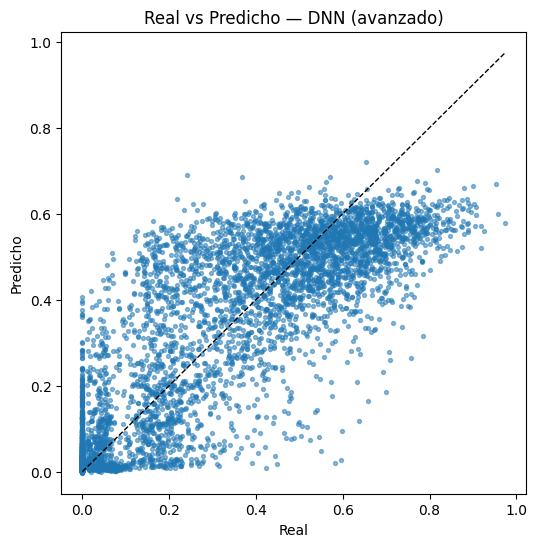

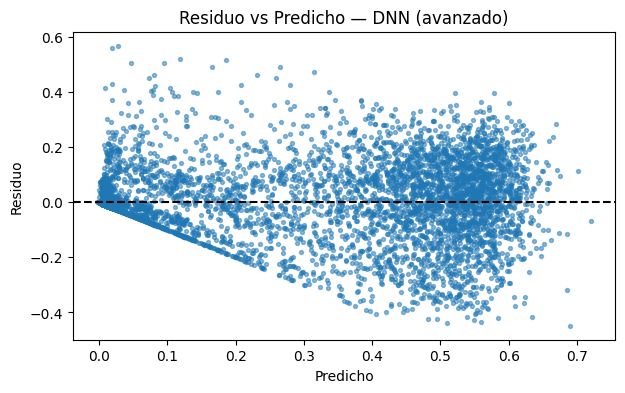

In [ ]:
best_adv_name = res_avanz_df.iloc[0]['modelo']
best_clas_name = res_clas_df.iloc[0]['modelo']

compare_df = pd.concat([
    res_clas_df[res_clas_df['modelo']==best_clas_name],
    res_avanz_df[res_avanz_df['modelo']==best_adv_name]
], ignore_index=True)

display(compare_df)

# Barras comparativas
barras_metricas(compare_df, titulo='Mejor clásico vs Mejor avanzado')

# Scatter y residuos lado a lado (dos plots separados)
scatter_real_pred(y_test, preds_clas[best_clas_name], f'{best_clas_name} (clásico)')
residuos_plot(y_test, preds_clas[best_clas_name], f'{best_clas_name} (clásico)')

scatter_real_pred(y_test, preds_avanz[best_adv_name], f'{best_adv_name} (avanzado)')
residuos_plot(y_test, preds_avanz[best_adv_name], f'{best_adv_name} (avanzado)')

In [ ]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

# ============ 1) Ordenar por tiempo ============
df_ts = df.copy()

# Intentar construir un timestamp (YEAR, MO, DY, HR). Si no existen, usa el índice actual.
if set(['YEAR','MO','DY','HR']).issubset(df_ts.columns):
    _tmp = df_ts.rename(columns={'MO':'month','DY':'day','HR':'hour'})
    df_ts['ts'] = pd.to_datetime(_tmp[['YEAR','month','day','hour']], errors='coerce')
else:
    df_ts['ts'] = pd.RangeIndex(start=0, stop=len(df_ts))

df_ts = df_ts.dropna(subset=['ts']).sort_values('ts').reset_index(drop=True)

# ============ 2) Selección de variables ============
target = 'ALLSKY_SFC_SW_DWN'
feat_candidates = ['T2M','RH2M','PS','WS10M','WD10M']  # crudas suelen ir mejor en LSTM
features_seq = [c for c in feat_candidates if c in df_ts.columns]
assert len(features_seq) > 0, "No hay features disponibles para LSTM."

# Quitar nulos en las columnas a usar
df_ts = df_ts.dropna(subset=features_seq + [target]).reset_index(drop=True)

X_all = df_ts[features_seq].values.astype('float32')
y_all = df_ts[target].values.astype('float32')

# ============ 3) Split temporal (sin mezclar orden) ============
train_ratio, val_ratio = 0.7, 0.1  # 70% train, 10% val, 20% test
n = len(df_ts)
i_train = int(n * train_ratio)
i_val   = int(n * (train_ratio + val_ratio))

X_tr_raw, y_tr_raw = X_all[:i_train], y_all[:i_train]
X_va_raw, y_va_raw = X_all[i_train:i_val], y_all[i_train:i_val]
X_te_raw, y_te_raw = X_all[i_val:], y_all[i_val:]

# Escalado con estadísticas SOLO del train
scaler = StandardScaler().fit(X_tr_raw)
X_tr = scaler.transform(X_tr_raw).astype('float32')
X_va = scaler.transform(X_va_raw).astype('float32')
X_te = scaler.transform(X_te_raw).astype('float32')

# ============ 4) Ventanas (lookback pasos -> 1 salida) ============
def make_windows(X, y, lookback=24, horizon=1, stride=1):
    n = len(X) - lookback - horizon + 1
    if n <= 0:
        return np.empty((0, lookback, X.shape[1]), dtype=np.float32), np.empty((0,), dtype=np.float32)
    Xs = np.lib.stride_tricks.sliding_window_view(X, (lookback, X.shape[1]))[:-horizon:stride, 0, :, :]
    ys = y[lookback + horizon - 1 :: stride]
    # Alinear longitudes si stride > 1
    n_final = min(len(Xs), len(ys))
    return Xs[:n_final], ys[:n_final]

LOOKBACK = 24   # usa 24 horas previas
HORIZON  = 1    # predicción a 1 paso

X_tr_seq, y_tr_seq = make_windows(X_tr, y_tr_raw, lookback=LOOKBACK, horizon=HORIZON)
X_va_seq, y_va_seq = make_windows(X_va, y_va_raw, lookback=LOOKBACK, horizon=HORIZON)
X_te_seq, y_te_seq = make_windows(X_te, y_te_raw, lookback=LOOKBACK, horizon=HORIZON)

print("Features usadas LSTM:", features_seq)
print("Shapes -> train:", X_tr_seq.shape, "val:", X_va_seq.shape, "test:", X_te_seq.shape)

# Datasets tf.data
BATCH = 256
train_ds = tf.data.Dataset.from_tensor_slices((X_tr_seq, y_tr_seq)).shuffle(4096).batch(BATCH).prefetch(1)
val_ds   = tf.data.Dataset.from_tensor_slices((X_va_seq, y_va_seq)).batch(BATCH).prefetch(1)

np.random.seed(42)
tf.random.set_seed(42)

def build_lstm(input_steps, input_feats):
    model = keras.Sequential([
        keras.layers.Input(shape=(input_steps, input_feats)),
        keras.layers.LSTM(64, return_sequences=True),
        keras.layers.Dropout(0.2),
        keras.layers.LSTM(32),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer=keras.optimizers.Adam(1e-3), loss='mse')
    return model

lstm = build_lstm(LOOKBACK, X_tr_seq.shape[2])

cb_es  = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss')
cb_rlr = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-5)

hist = lstm.fit(
    train_ds,
    validation_data=val_ds,
    epochs=80,
    verbose=0,
    callbacks=[cb_es, cb_rlr]
)

# Predicción sobre el test secuencial
y_hat_lstm = lstm.predict(X_te_seq, verbose=0).ravel()

# Utilidades de evaluación (reusa las tuyas; si no existen, se crean)
try:
    eval_reg
except NameError:
    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
    def eval_reg(nombre, y_true, y_pred):
        rmse = float(np.sqrt(((y_true - y_pred)**2).mean()))
        return {'modelo': nombre, 'R2': float(r2_score(y_true, y_pred)),
                'MAE': float(mean_absolute_error(y_true, y_pred)), 'RMSE': rmse}

res_lstm = eval_reg(f'LSTM (L={LOOKBACK}, H={HORIZON})', y_te_seq, y_hat_lstm)
pd.DataFrame([res_lstm])


Features usadas LSTM: ['T2M', 'RH2M', 'PS', 'WS10M', 'WD10M']
Shapes -> train: (30686, 24, 5) val: (4363, 24, 5) test: (8751, 24, 5)


modelo       R2      MAE     RMSE
0  LSTM (L=24, H=1) 0.945697 0.033159 0.059887

In [ ]:
# Gráficos rápidos

plt.figure(figsize=(6,6))
plt.scatter(y_te_seq, y_hat_lstm, s=8, alpha=0.5)
m, M = float(np.min(y_te_seq)), float(np.max(y_te_seq))
plt.plot([m,M],[m,M],'--', lw=1, color='k')
plt.xlabel('Real'); plt.ylabel('Predicho')
plt.title('Real vs Predicho — LSTM')
plt.show()

resid = y_te_seq - y_hat_lstm
plt.figure(figsize=(7,4))
plt.scatter(y_hat_lstm, resid, s=8, alpha=0.5)
plt.axhline(0, ls='--', color='k')
plt.xlabel('Predicho'); plt.ylabel('Residuo')
plt.title('Residuos vs Predicho — LSTM')
plt.show()

NameError: name 'y_hat_lstm' is not defined

<Figure size 600x600 with 0 Axes>